## Importing the libraries

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [77]:
data=pd.read_csv(r"C:\Users\HP\Downloads\Wine_clust (1).csv")

## Data Analysis

In [78]:
data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [79]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [4]:
data.shape

(178, 13)

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.isnull().sum()            #Checking for null values.

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

INFERENCE:There are no null values present in the dataset

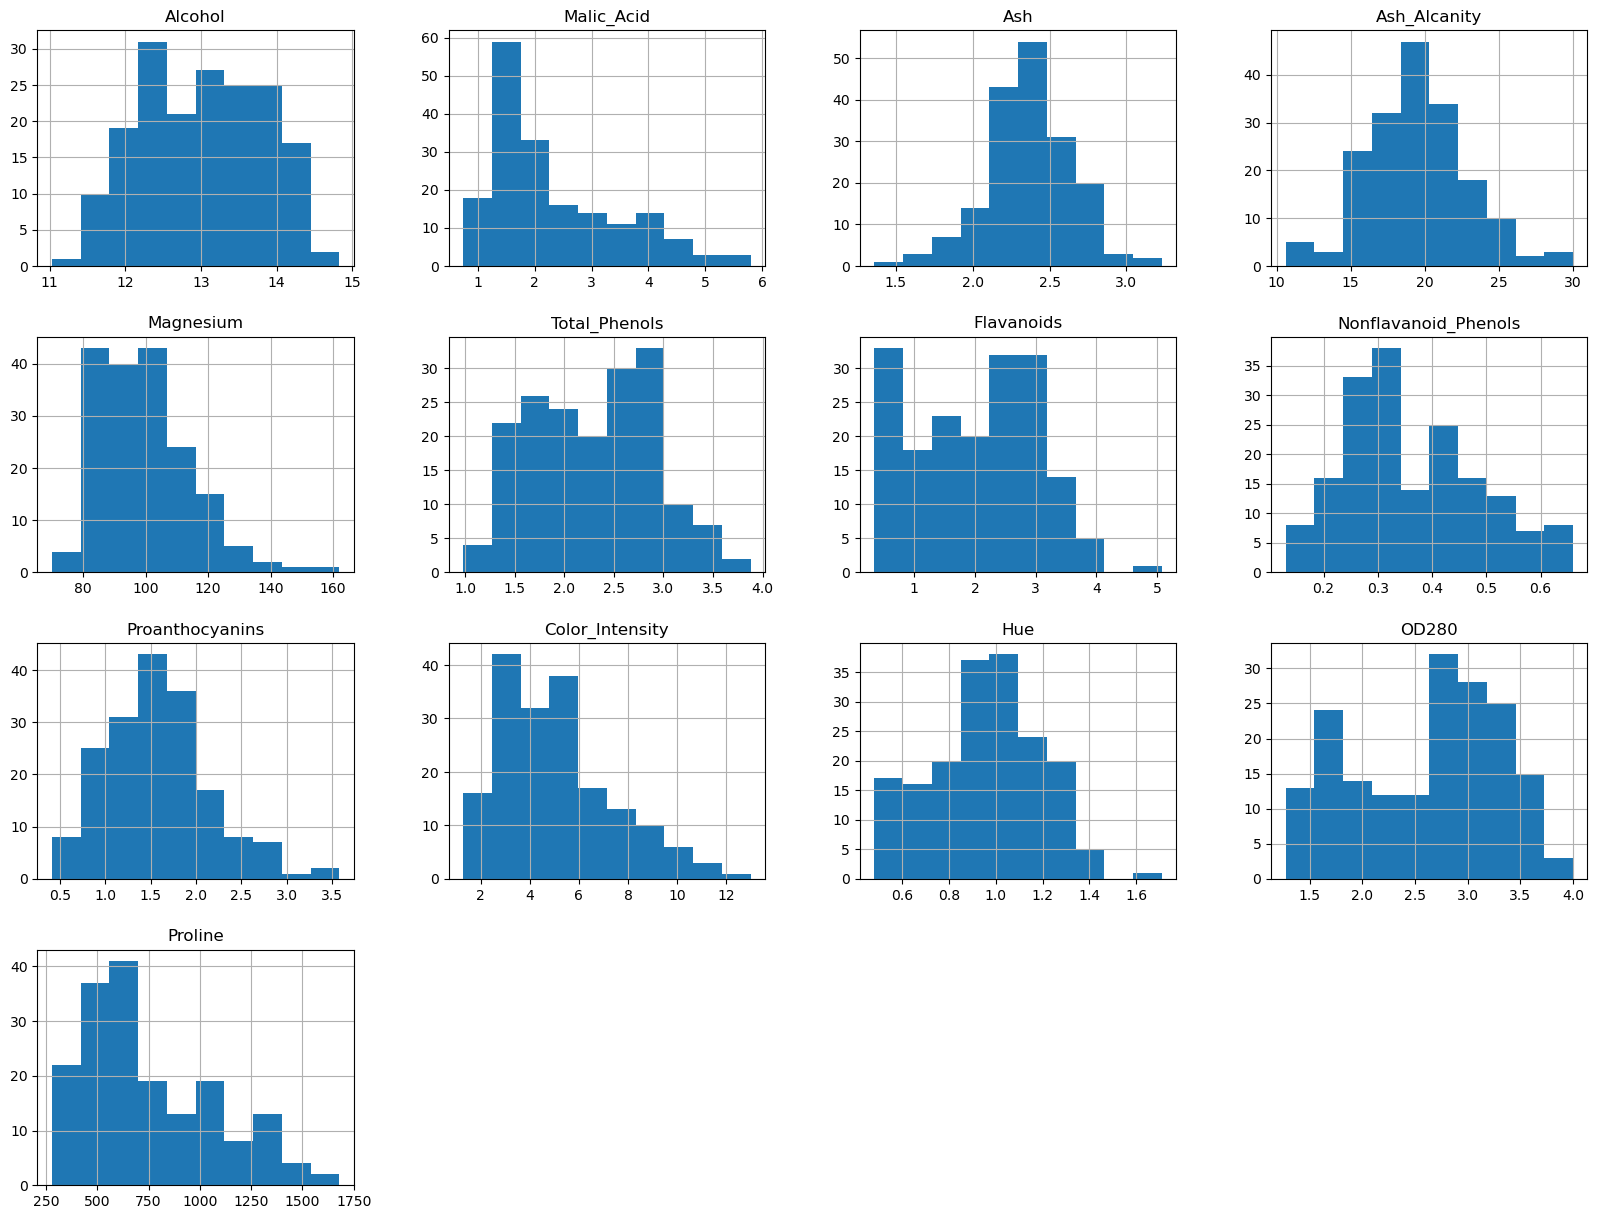

In [7]:
data.hist(figsize=(20,15))             #Checking the distribution of the data.
plt.show()

<AxesSubplot:>

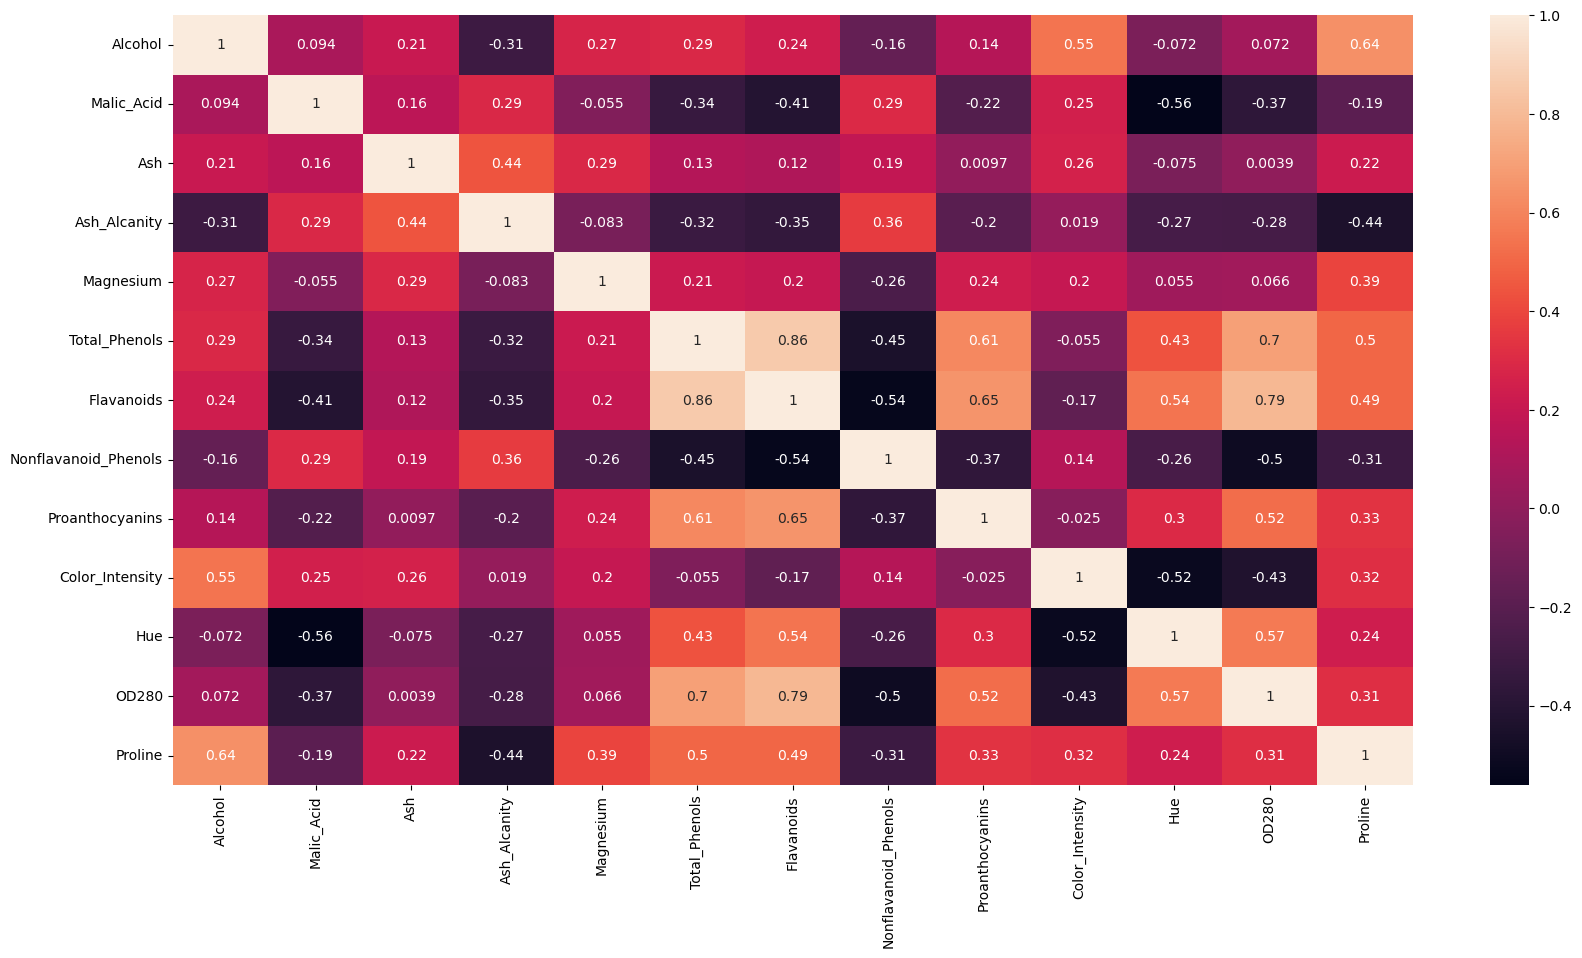

In [8]:
plt.figure(figsize=(20,10))                       #Checking for the correlation
sns.heatmap(data.corr(), annot= True)           

In [9]:
#check for the correlated value
for n in range(len(data.corr().columns)):
    for b in range(n):
        if abs(data.corr().iloc[n,b])> 0.7:
            name= data.corr().columns[n]
            print("highly correlated columns are: ",name)

highly correlated columns are:  Flavanoids
highly correlated columns are:  OD280


In [10]:
data= data.drop('OD280',axis= 1)                # here we can drop the column OD280
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,735


## PCA

In [22]:
from sklearn.preprocessing import StandardScaler       #Scaling

ss=StandardScaler(with_mean=True,with_std=True)
ss.fit(data)
scaled_data=ss.transform(data)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca=PCA()
pca.fit(scaled_data)

PCA()

In [25]:
pip install pca

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7074 sha256=1f5b90cd8c64f0d4c3c2444067d95f416f2001f2911edad2210396c36719bb5f
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\6b\1d\79\4326d5f3a7d86fb9900e5564e7a0f98b552da5103ca762f24f
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=44f744a3aa2a667203620d44a84ec028ed92aa2f8504cc79b675b5c95f6a7bb2
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built adjustText wget
Note: you may need to restart the kernel to use updated packages.


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


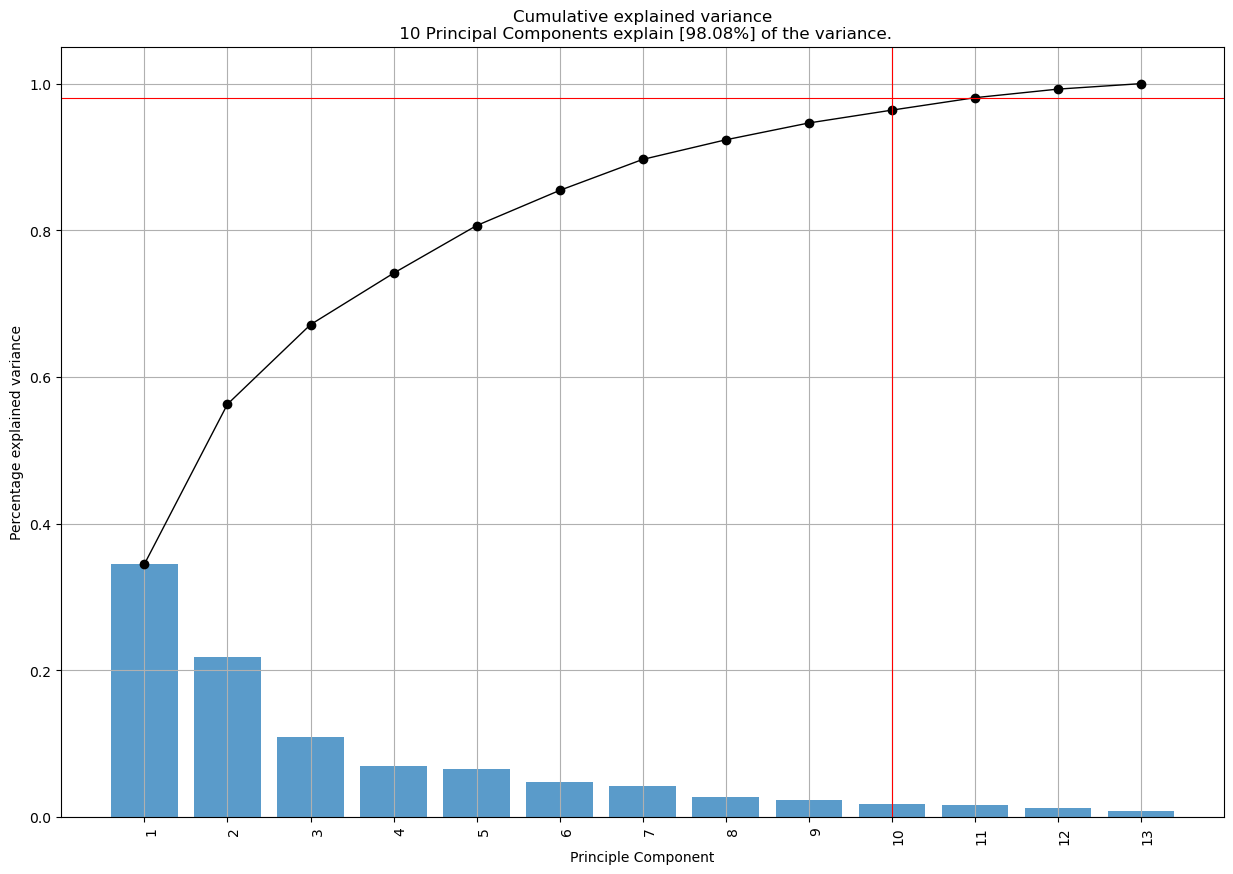

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 640x480 with 0 Axes>

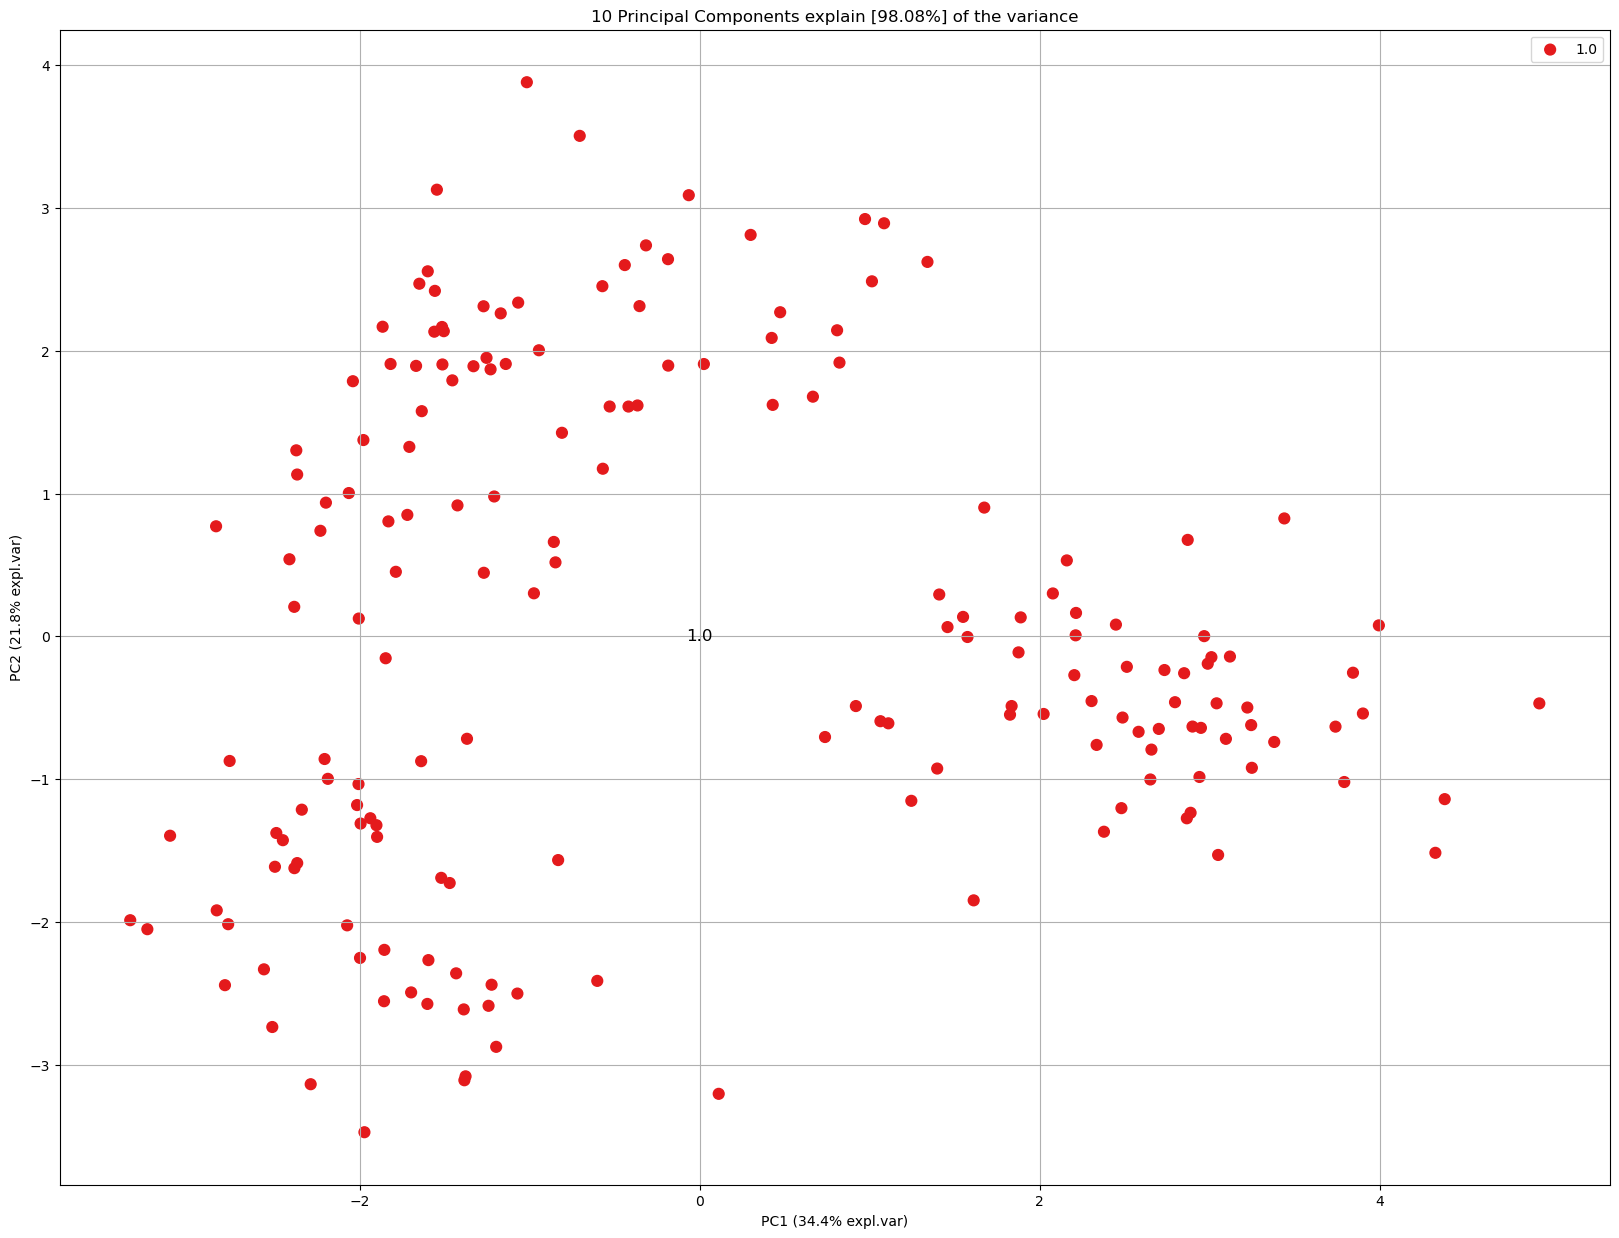

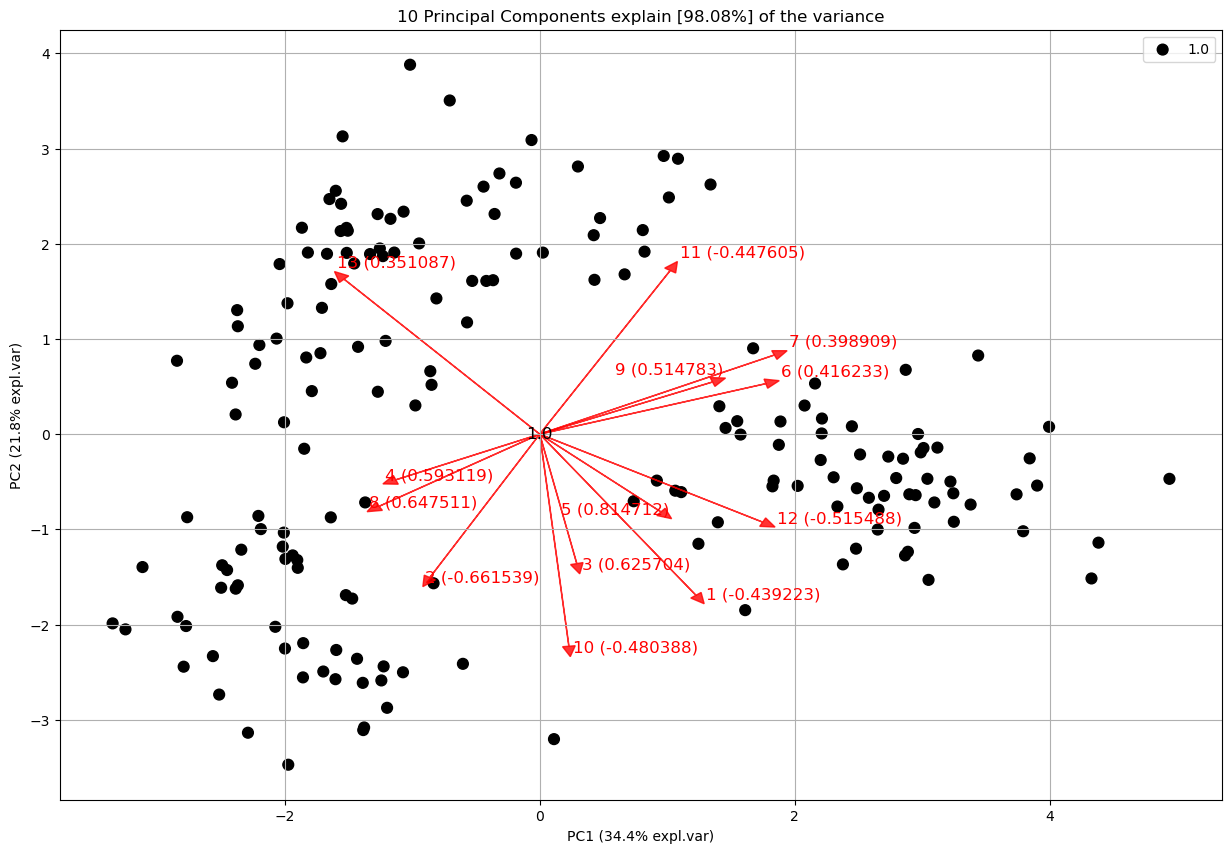

In [26]:
from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Fit transform
results = model.fit_transform(scaled_data)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=13,cmap='copper')

INFERENCE:We observe that there is an elbow at 3.Here there seems to be 3 clusters from the biplot

In [27]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(scaled_data)

In [30]:
pca_data=pd.DataFrame(x_pca,columns=["PC1","PC2","PC3"])
pca_data.head()

,PC1,PC2,PC3
0,3.379417,-0.739299,-0.208303
1,2.159325,0.531957,-2.092868
2,2.795796,-0.460840,1.031038
3,4.327352,-1.515509,-0.117791
4,1.396854,-0.925433,2.011648


In [31]:
print(pca.explained_variance_ratio_)

[0.34489876 0.21800376 0.10848149]


## K Means Clustering

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


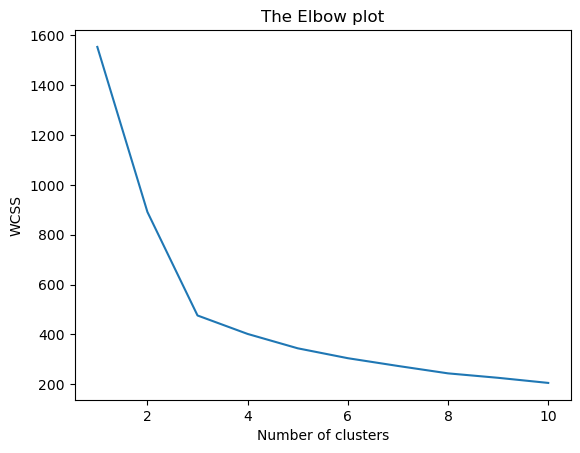

In [34]:
from sklearn.cluster import KMeans


# elbow method
wcss=[]
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(pca_data)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

INFERENCE:We observe the elbow at k=3.Hence we select k=3 for our KMeans clustering algorithm.

In [41]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(pca_data)

In [42]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
kmeans.inertia_

476.1877416398278

In [44]:
kmeans.n_iter_

3

In [45]:
kmeans.cluster_centers_

array([[-0.96473599,  1.81584214,  0.17830451],
       [ 2.58225598, -0.46823328,  0.02836868],
       [-1.9482155 , -1.89042776, -0.27969919]])

In [46]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 62, 0: 67, 2: 49})

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


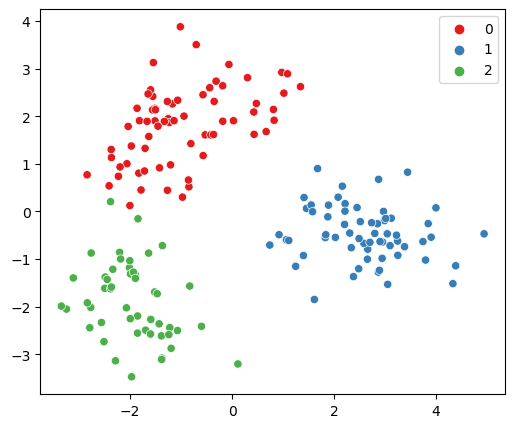

In [89]:
plt.figure(figsize=(6,5))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=kmeans.labels_,palette='Set1')
plt.show()
     

INFERENCE:The data has been clustered into 3 clusters labelled as 0,1,2 using K-Means clustering algorithm

## Agglomerative Hierarchial Clustering

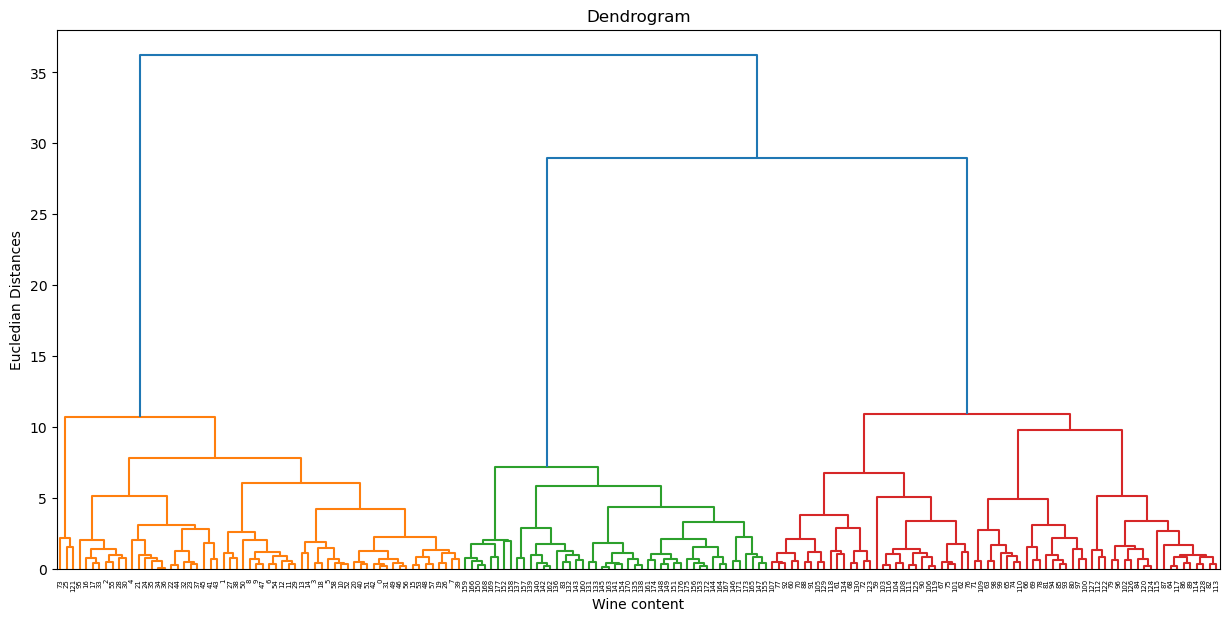

In [48]:
import scipy.cluster.hierarchy as sch
plt.figure (figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(pca_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine content')
plt.ylabel('Eucledian Distances')
plt.show()

INFERENCE:Here we take number of clusters as 3.

In [52]:
#building heirarchichal clustering model
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward',)
agg.fit(pcadf)
     
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [53]:
#number of observations in each cluster
from collections import Counter
Counter(agg.labels_)

Counter({1: 62, 0: 69, 2: 47})

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


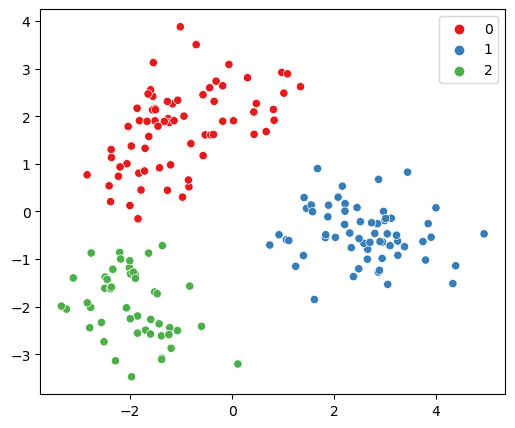

In [90]:
plt.figure(figsize=(6,5))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=agg.labels_,palette='Set1')
plt.show()

INFERENCE:The data has been clustered into 3 clusters labelled as 0,1,2 using Agglomerative Hierarchical clustering algorithm.

## DBSCAN Clustering

[ 0  1  0  2  2  2 -1  0  2 -1 -1  1 -1  0  1  2  0  0 -1  1  2  0  1  0
 -1  2 -1  2  1 -1  2  0 -1  1  1 -1  1 -1  0 -1 -1  1  0  1  1  2  1 -1
  2  1  2 -1 -1  2  1  0  0  2 -1 -1  1 -1  0 -1  1 -1  0  1  0  1  2 -1
 -1  2  1  0  1  2  0  0  2  0 -1  0  0 -1  1 -1 -1  0  2 -1  2  0  1  1
  0 -1 -1 -1  1 -1 -1  1  0  0  2  0  1  1  0  2 -1  0  2  2  0 -1 -1  1
 -1 -1  1  1  1  2  1  1  1 -1  2  2 -1  2  2  1  2  0 -1  2  1  0  1 -1
  2  2  0 -1 -1  1  0  2  0 -1  2  2  1  1  0  1 -1 -1  1 -1  2 -1  0  0
 -1  2 -1  0 -1  1  1 -1  0  1 -1 -1  1  2  0  0  0 -1  1 -1  0  2  0  0
 -1  1  2  0  1  2  0  2  1  2 -1  2  1  2  0  2 -1  1  0  0  2  1 -1 -1
  1  0 -1  1 -1 -1  1  1  0 -1 -1  0 -1 -1 -1  1  1  0  1  2 -1 -1 -1  0
  1  2  2 -1  2 -1 -1  2  0  1  1  0 -1 -1  2  0  1  2  0  0  2  0 -1  2
 -1  2  0  1  1  1  1  0  0  0  0 -1 -1  2  1  0  0  1  1 -1  2 -1  2  2
  1  1  2  2  2 -1  0  0 -1  1  0 -1]
['y', 'r', 'g']


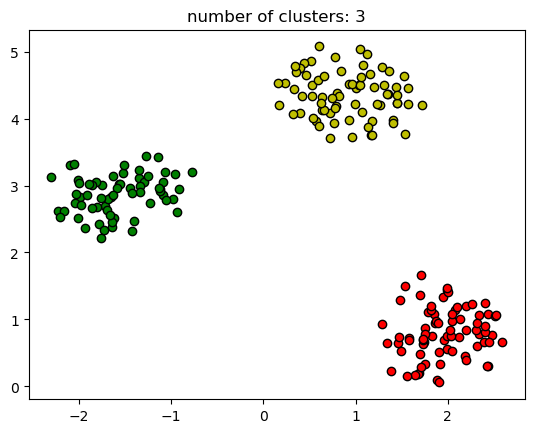

Silhouette Coefficient:0.37


In [75]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
  
# Load data in X
data, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=10).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)
  
unique_labels = set(labels)
colors = ['y', 'r', 'g']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()
  
#evaluation metrics
sc = metrics.silhouette_score(data, labels)
print("Silhouette Coefficient:%0.2f"%sc)

INFERENCE:The data has been clustered into 3 clusters using DBSCAN clustering algorithm.